# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ตัวเลขฮินดูอารบิคเขียนด้วยลายมือ

In [3]:
path = untar_data(URLs.MNIST)
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/testing')]

In [5]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3')]

- minst_png
  - training
    - 0
    - 1
    - 2
    - 3
    - 4
    - 5
    - 6
    - 7 
    - 8
    - 9    
  - testing
    - 0
    - 1
    - 2
    - 3
    - 4
    - 5
    - 6
    - 7 
    - 8
    - 9    
  

In [6]:
# (path_training/'5').ls()

# 3. เตรียมข้อมูล



In [7]:
batchsize = 128
np.random.seed(0)
transform = get_transforms(do_flip=False)

databunch = ImageDataBunch.from_folder(path, 'training', valid_pct=0.2, size=28, 
                                       ds_tfms=transform, bs=batchsize).normalize()

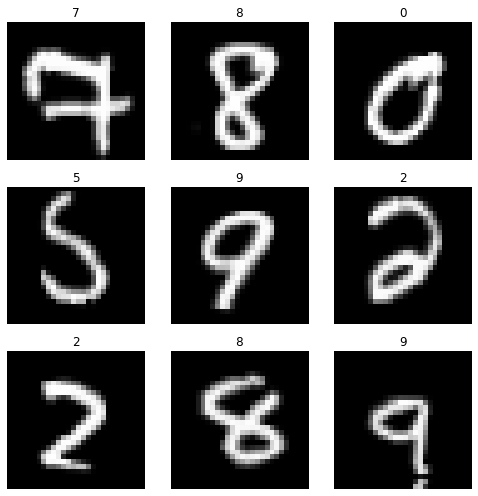

In [8]:
databunch.show_batch(rows=3, figsize=(7, 7))

In [9]:
databunch.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
learner = cnn_learner(databunch, models.resnet18, metrics=accuracy)

In [ ]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
